In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!pip install --upgrade tensorflow
!pip install -q -U tensorboard

Requirement already up-to-date: tensorflow in /anaconda3/lib/python3.6/site-packages (2.2.0)


In [3]:
# Import all the necessary files!
import numpy
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)

import tensorboard
tensorboard.__version__

TensorFlow version:  2.2.0


'2.0.0'

In [4]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

--2020-06-18 13:41:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com... 2607:f8b0:400a:801::2010, 216.58.217.48
Connecting to storage.googleapis.com|2607:f8b0:400a:801::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

/tmp/inception_v3_w 100%[===================>]  83.84M  10.0MB/s    in 8.3s    

2020-06-18 13:41:33 (10.1 MB/s) - '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' saved [87910968/87910968]



In [5]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [6]:
def nnParaCnt(inputNode, node):
    return inputNode * node + node

def flattenCnt(inputDim=()):
    prod = 1
    for i in range(len(inputDim)):
        prod *= inputDim[i]
    return prod

def conv3DCnt(f_width, f_length, prev_channel, numFilter):
    return  f_width * f_length * prev_channel * numFilter + numFilter

for i, layer in enumerate(pre_trained_model.layers):
    if len(layer.get_weights()) > 0:
        filter_shape = layer.get_weights()[0].shape
        name = layer.name.split('_')[0]
        
        if len(filter_shape) == 4:
            print(i, layer.name, filter_shape)
            print('Num of parameter: {} = {}*{}*{}*{}+{} \n'
                  .format(conv3DCnt(filter_shape[0],filter_shape[1],filter_shape[2],filter_shape[3]), 
                          filter_shape[0], filter_shape[1], filter_shape[2],filter_shape[3],filter_shape[3]))
        
        if len(filter_shape) == 2:   
            print(i, layer.name, filter_shape, layer.get_weights()[1].shape)
            print('Num of parameter: {} = {}*{}+{} \n'.format(nnParaCnt(filter_shape[0], filter_shape[1]),
                                                filter_shape[0], filter_shape[1], filter_shape[1]))
        
        if name == 'batch':
            print(i, layer.name)
            print('Num of parameter: {} \n'.format(filter_shape[0]*3))
    else:
        print(i, layer.name, '\n')

0 input_1 

1 conv2d (3, 3, 3, 32)
Num of parameter: 896 = 3*3*3*32+32 

2 batch_normalization
Num of parameter: 96 

3 activation 

4 conv2d_1 (3, 3, 32, 32)
Num of parameter: 9248 = 3*3*32*32+32 

5 batch_normalization_1
Num of parameter: 96 

6 activation_1 

7 conv2d_2 (3, 3, 32, 64)
Num of parameter: 18496 = 3*3*32*64+64 

8 batch_normalization_2
Num of parameter: 192 

9 activation_2 

10 max_pooling2d 

11 conv2d_3 (1, 1, 64, 80)
Num of parameter: 5200 = 1*1*64*80+80 

12 batch_normalization_3
Num of parameter: 240 

13 activation_3 

14 conv2d_4 (3, 3, 80, 192)
Num of parameter: 138432 = 3*3*80*192+192 

15 batch_normalization_4
Num of parameter: 576 

16 activation_4 

17 max_pooling2d_1 

18 conv2d_8 (1, 1, 192, 64)
Num of parameter: 12352 = 1*1*192*64+64 

19 batch_normalization_8
Num of parameter: 192 

20 activation_8 

21 conv2d_6 (1, 1, 192, 48)
Num of parameter: 9264 = 1*1*192*48+48 

22 conv2d_9 (3, 3, 64, 96)
Num of parameter: 55392 = 3*3*64*96+96 

23 batch_normaliza

In [7]:
pre_trained_model.get_layer('conv2d').get_weights()[0][0,0,0,:]

array([-0.07807939, -0.04825088, -0.10613357, -0.04679289,  0.1368831 ,
        0.02190383,  0.02021976, -0.04318773,  0.09171231, -0.07391205,
       -0.13648741, -0.11801233,  0.06872515, -0.04852162,  0.07977593,
       -0.09321758,  0.04497769, -0.13521053, -0.0221467 ,  0.03658865,
        0.1273732 ,  0.07982759,  0.1032151 , -0.02926268,  0.13622431,
       -0.08181077,  0.05255572, -0.01614715,  0.02465899,  0.00425522,
        0.05431698,  0.07490206], dtype=float32)

In [8]:
pre_trained_model.get_layer('conv2d').get_weights()[0][0,0,0,:]

array([-0.07807939, -0.04825088, -0.10613357, -0.04679289,  0.1368831 ,
        0.02190383,  0.02021976, -0.04318773,  0.09171231, -0.07391205,
       -0.13648741, -0.11801233,  0.06872515, -0.04852162,  0.07977593,
       -0.09321758,  0.04497769, -0.13521053, -0.0221467 ,  0.03658865,
        0.1273732 ,  0.07982759,  0.1032151 , -0.02926268,  0.13622431,
       -0.08181077,  0.05255572, -0.01614715,  0.02465899,  0.00425522,
        0.05431698,  0.07490206], dtype=float32)

In [9]:
pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

# Expected Output is extremely large, but should end with:

#batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
#__________________________________________________________________________________________________
#activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
#__________________________________________________________________________________________________
#mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
#                                                                 activation_276[0][0]             
#__________________________________________________________________________________________________
#concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
#                                                                 activation_280[0][0]             
#__________________________________________________________________________________________________
#activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
#__________________________________________________________________________________________________
#mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
#                                                                 mixed9_1[0][0]                   
#                                                                 concatenate_5[0][0]              
#                                                                 activation_281[0][0]             
#==================================================================================================
#Total params: 21,802,784
#Trainable params: 0
#Non-trainable params: 21,802,784

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [16]:
import pydot
import graphviz

# conda install -c anaconda python-graphviz could fix the grapviz problem
tf.keras.utils.plot_model(pre_trained_model, show_shapes=True)

In [17]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [18]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

In [19]:
model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

# Expected output will be large. Last few lines should be:

# mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_248[0][0]             
#                                                                  activation_251[0][0]             
#                                                                  activation_256[0][0]             
#                                                                  activation_257[0][0]             
# __________________________________________________________________________________________________
# flatten_4 (Flatten)             (None, 37632)        0           mixed7[0][0]                     
# __________________________________________________________________________________________________
# dense_8 (Dense)                 (None, 1024)         38536192    flatten_4[0][0]                  
# __________________________________________________________________________________________________
# dropout_4 (Dropout)             (None, 1024)         0           dense_8[0][0]                    
# __________________________________________________________________________________________________
# dense_9 (Dense)                 (None, 1)            1025        dropout_4[0][0]                  
# ==================================================================================================
# Total params: 47,512,481
# Trainable params: 38,537,217
# Non-trainable params: 8,975,264

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [20]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = '//tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

--2020-06-18 13:44:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com... 2607:f8b0:400a:803::2010, 172.217.14.240
Connecting to storage.googleapis.com|2607:f8b0:400a:803::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: '/tmp/horse-or-human.zip'

/tmp/horse-or-human 100%[===================>] 142.65M  10.3MB/s    in 14s     

2020-06-18 13:44:28 (10.3 MB/s) - '/tmp/horse-or-human.zip' saved [149574867/149574867]

--2020-06-18 13:44:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com... 2607:f8b0:400a:803::2010, 172.217.14.240
Connecting to storage.googleapis.com|2607:f8b0:400a:803::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: '/tmp/validation-horse-or-human.zip'

/tmp/validation-hor 10

In [21]:
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

train_horses_dir = os.path.join(train_dir, 'horses') # Directory with our training horse pictures
train_humans_dir = os.path.join(train_dir, 'humans') # Directory with our training humans pictures
validation_horses_dir = os.path.join(validation_dir, 'horses') # Directory with our validation horse pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')# Directory with our validation humanas pictures

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

# Expected Output:
# 500
# 527
# 128
# 128

500
527
128
128


In [22]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 1,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please

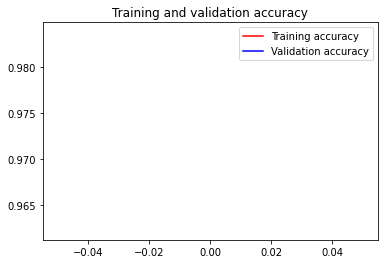

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()